## Esercizio 11.1 - Fit lineare

In questo esercizio considero il caso semplice di funzione lineare
$$
f(x)=2x+1
$$
ed eseguo tentativi di fit su di essa tramite una rete neurale sequenziale.

Per impratichirmi con le reti neurali, ho provato a osservare come la regressione lineare dipenda dai parametri
- numero di epoche $N_{\mathrm{epochs}}$
- numero di dati di *train* $N_{\mathrm{train}}$
- rumore $\sigma$

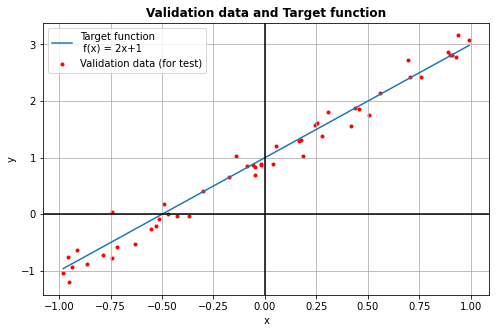

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================
# Define parameters of an ideal linear function.
# We want to predict them after
# ==============================================

# parametri da indagare
N_epochs = 20
N_train = 1000 # <<< train
N_valid = 50 # <<< test
Sigma = 0.2

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)        # training inputs
x_valid = np.random.uniform(-1, 1, N_valid)        # ...
x_valid.sort()
y_target = m * x_valid + b                         # target linear function

sigma = Sigma                                      # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # array of measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma) # array of measures from which we want to test prediction ability of the NN

# plot validation and target dataset
plt.figure(figsize=(8,5))
plt.plot(x_valid, y_target, label = "Target function\n f(x) = 2x+1")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

In [98]:
# Use PYTHON 3.9.12

# ==============================================
# INITIALIZE Neural Network (Sequential) model:
# a single neuron can make the fitting job, so
# i use only one layer on one neuron.
# ==============================================

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))   # nota: qui non c'è una funzione di attivazione (non lineare), 
                                        # mentre è necessario aggiungerla per i punti successivi (esplorare quali vanno meglio)

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# ==============================================
# Get a summary of our composed model
# ==============================================
# model.summary()

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(    x=x_train, y=y_train, 
                        batch_size=32, epochs=N_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_valid, y_valid))

Epoch 1/20
32/32 [==============================] - 1s 15ms/step - loss: 1.7759 - mse: 1.7759 - val_loss: 1.2834 - val_mse: 1.2834
Epoch 2/20
32/32 [==============================] - 0s 8ms/step - loss: 0.9620 - mse: 0.9620 - val_loss: 0.7703 - val_mse: 0.7703
Epoch 3/20
32/32 [==============================] - 0s 7ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.4994 - val_mse: 0.4994
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.3724 - mse: 0.3724 - val_loss: 0.3385 - val_mse: 0.3385
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.2499 - mse: 0.2499 - val_loss: 0.2362 - val_mse: 0.2362
Epoch 6/20
32/32 [==============================] - 0s 7ms/step - loss: 0.1735 - mse: 0.1735 - val_loss: 0.1702 - val_mse: 0.1702
Epoch 7/20
32/32 [==============================] - 0s 8ms/step - loss: 0.1256 - mse: 0.1256 - val_loss: 0.1259 - val_mse: 0.1259
Epoch 8/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0942 - mse: 0.0

Guessed parameters
Slope   m = [[1.9664999]]
Interc. q = [1.0040276]

TEST DATA evaluation
Test loss:      0.034938305616378784
Test accuracy:  0.034938305616378784

EXACT CURVE evaluation
Test loss:      0.0004267797921784222
Test accuracy:  0.0004267797921784222


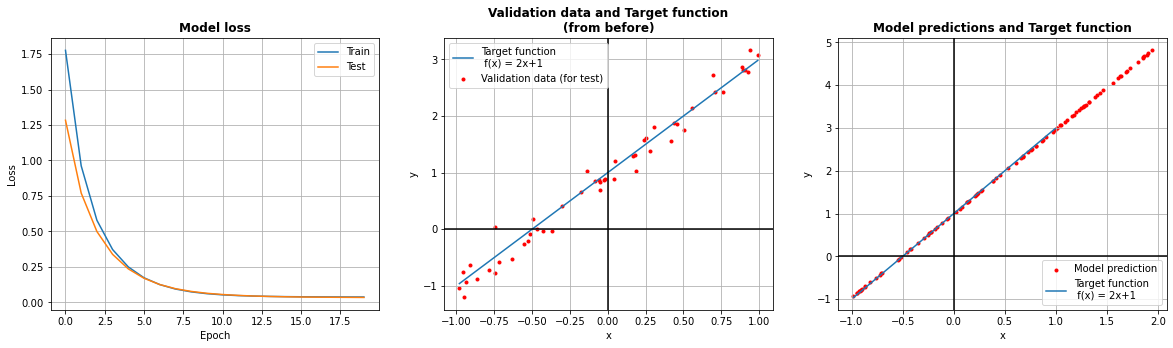

In [99]:
# ==============================================
# Return Weights and Biases (w <-> m=2)(b <-> q=1)
# ==============================================

print("Guessed parameters")
w,b = model.get_weights() # hope they are similar to m=2 and q=1.
                          # Was the fit successful?
print("Slope   m = "+str(w))
print("Interc. q = "+str(b))
print()

# ==============================================
# EVALUATE MODEL
# ==============================================

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

# ==============================================
# Training history
# ==============================================

plt.figure(figsize=(20,5))

# Plot training & validation loss values
plt.subplot(1,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
#plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-1, 2, 100) 
y_predicted = model.predict(x_predicted)

# (re)plot validation and target dataset
plt.subplot(1,3,2)
plt.plot(x_valid, y_target, label = "Target function\n f(x) = 2x+1")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function\n(from before)", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()

# plot
plt.subplot(1,3,3)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
plt.plot(x_valid, y_target, label = "Target function\n f(x) = 2x+1")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

### Osservazioni

Tenendo un numero basso di epoche, ad esempio 10 (= chiedere alla rete di imparare velocemente) e fissando $N_{train} = 500$:
- con $\sigma = 0$, la predizione è scarsa, perchè la model loss sui dati di test non ha ancora fatto tempo a convergere a quella fatta sui dati di train, nè a stabilizzarsi sul minimo.
- con $\sigma = 0.2$ la situazione migliora, la predizione è più accurata. Le model loss convergono bene, anche perché partono in origine meno distanti tra loro
- con $\sigma = 0.3$ la situazione sembra ottima. La differena inizale di loss tra test e train è ridotta, e con le epoche si riduce ulteriormente. Nello specifico si nota che tra le prime epoche, la loss di test supera quella di train per restare sopra, coerentemente col fatto che il modello si è calibrato sui dati di train e ora vede per la prima volta quelli di test.
- con $\sigma = 0.5$ entrambe le loss rimangono molto elevate e 10 epoche non sono sufficienti a permettere una buona calibrazione al modello, che infatti fa predizioni completamente errate.

**In sintesi**
Più sono rumorosi i dati forniti al modello per calibrarsi e testarsi, più epoche saranno necessarie affinché la calibrazione fornisca risultati accettabili, ovvero che la capacità del modello di prevedere dati sulla retta sia buona. In generale le loss function decadono entro una decina di epoche, oltre le quali proseguire nella calibrazione non porta a significativi miglioramenti nella capacità predittiva del modello.

Naturalmente con $\sigma = 0$, all'aumentare delle epoche il fit tende alla perfezione. Il problema di tenere $\sigma = 0$ diventa chiaro immaginando di avere a che fare con del rumore e una rete di numerosi nodi che rischia di overfittare quel rumore: in tal caso la $\sigma$ dovrà essere dell'ordine di grandezza del rumore o più, per dominare su di esso.

Aumentando il numero di punti di train, come ci si poteva aspettare, la rete apprende più velocemente, ovvero si osserva ad esempio che (fissata $\sigma=0.2$) il minimo della model loss si raggiunge in circa $20$ epoche con $N_{train} = 500$, mentre si raggiunge in circa $10$ epoche con $N_{train} = 1000$. Può convenire investire sul training piuttosto che sul numero di epoche, dal momento che in un caso come questo, il tempo di training aumenta di più con le epoche piuttosto che col numero di dati di train.